# Question 2:

# A. Sentiment Analysis Twitter Airline

Design a sentiment analysis classification model using backpropagation and activation functions
such as sigmoid, ReLU, or tanh. Implement a neural network that can classify sentiment
(positive/negative) from a small dataset. Demonstrate how backpropagation updates the weights
during the training process. (link Provided at the top of the page to download the dataset)

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import History
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [8]:
data = pd.read_csv('/content/Tweets.csv')

print(data.head())

       tweet_id airline_sentiment  airline_sentiment_confidence  \
0  5.703061e+17           neutral                        1.0000   
1  5.703011e+17          positive                        0.3486   
2  5.703011e+17           neutral                        0.6837   
3  5.703010e+17          negative                        1.0000   
4  5.703008e+17          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnardino                 NaN            

# Preprocessing

In [9]:
data = data[['text', 'airline_sentiment']]

data['airline_sentiment'] = data['airline_sentiment'].apply(lambda x: 1 if x == 'positive' else 0)

max_words = 5000
max_len = 100

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(data['text'])
sequences = tokenizer.texts_to_sequences(data['text'])

X = pad_sequences(sequences, maxlen=max_len)

y = data['airline_sentiment'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")


Training data shape: (11712, 100)
Testing data shape: (2928, 100)


# Creating a Simple Feed-Forward Neural Network

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

def build_model(activation_function='relu'):
    model = Sequential()

    model.add(Dense(128, input_shape=(max_len,), activation=activation_function))

    model.add(Dense(64, activation=activation_function))

    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model



# Interpretation of the Model and Results

# 1. Model Architecture:
    - We've built a simple feedforward neural network with two hidden layers.
   - The input layer has `max_len` (100) neurons, representing the maximum length of our padded text sequences.
   - The hidden layers have 128 and 64 neurons, respectively.
   - The output layer has a single neuron with a sigmoid activation function, which produces a probability score between 0 and 1, representing the likelihood of a positive sentiment.

# 2. Activation Function:
   - We've chosen the ReLU activation function for the hidden layers, which is commonly used in deep learning models. It introduces non-linearity and helps the network learn complex patterns.
   
   - The output layer uses the sigmoid function to produce a probability score for the binary classification (positive/negative).

# 3. Loss Function:

   - We've used binary cross-entropy as the loss function, which is suitable for binary classification tasks. It measures the difference between the predicted probability and the actual label.


# 4. Optimizer:
   - We've used the Adam optimizer, an adaptive optimization algorithm that typically performs well in practice. It adjusts the learning rate for each weight based on its historical gradient information.


# 6. Evaluation Metrics:
   - Accuracy is used to evaluate the model's performance on the test data. It indicates the percentage of correctly classified tweets.




# Training the Model Using Backpropagation

In [11]:
# Import necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Assuming 'build_model' is defined in a previous cell or imported from a module
# Call the build_model function to create the model
model = build_model()

# Train the model using backpropagation
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])


history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(X_test, y_test),
                    verbose=1)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


366/366 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7326 - loss: 18.0783 - val_accuracy: 0.6909 - val_loss: 5.5833
Epoch 2/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7461 - loss: 4.1982 - val_accuracy: 0.6448 - val_loss: 3.7122
Epoch 3/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7632 - loss: 2.3965 - val_accuracy: 0.7186 - val_loss: 2.4100
Epoch 4/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7666 - loss: 1.7341 - val_accuracy: 0.8142 - val_loss: 2.1146
Epoch 5/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7835 - loss: 1.0755 - val_accuracy: 0.7900 - val_loss: 1.4275
Epoch 6/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7943 - loss: 0.8142 - val_accuracy: 0.7275 - val_loss: 1.1465
Epoch 7/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7897 - loss: 0.7385 - val_accuracy: 0.7828 - val_loss: 1.0207
Epoch 8/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8126 - loss: 0.5769 - val_accuracy: 0.7531 - val

# Visualization

Test Loss: 0.4094
Test Accuracy: 0.8463


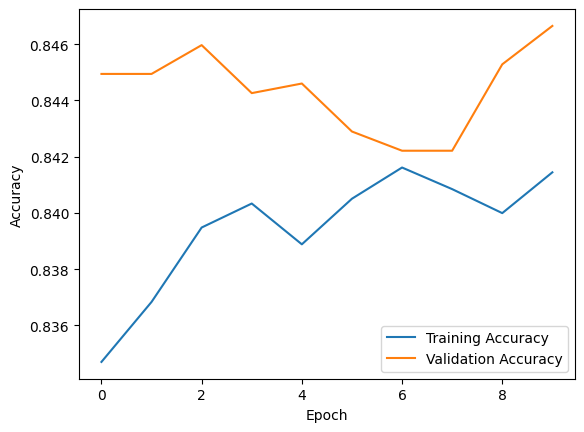

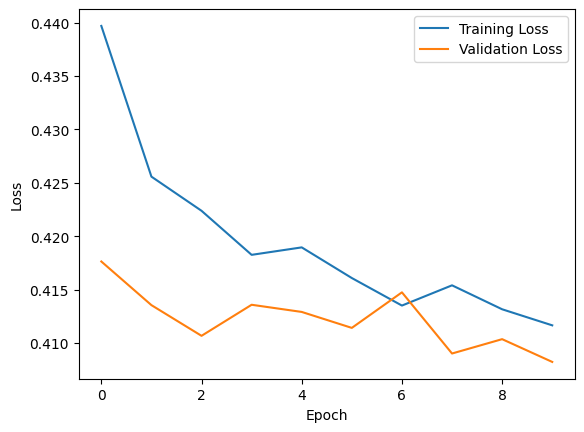

In [14]:

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot the training and validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()






# Interpretation of the Results:

# 1. Test Accuracy:
The test accuracy achieved by the model indicates its ability to generalize to unseen data.

- A higher test accuracy signifies that the model is performing well and is not overfitting the training data.

    - A lower test accuracy might indicate that the model is overfitting or that the model needs improvement.

# 2. Accuracy and Loss Curves:

   - Training accuracy should generally increase over epochs as the model learns from the data.

   - Validation accuracy can fluctuate and may plateau after some point. It is important to monitor the validation accuracy to detect if the model is overfitting.

   - Training loss should generally decrease over epochs, showing that the model is improving in its ability to predict the correct sentiment.
   - Validation loss can fluctuate and may increase if the model is overfitting.
#

# Experimenting with Different Activation Functions

In [12]:
# Experiment with different activation functions
activation_functions = ['sigmoid', 'relu', 'tanh']
histories = {}

for activation in activation_functions:
    print(f"\nTraining with {activation} activation function\n")

    # Build and train the model
    model = build_model(activation_function=activation)
    history = model.fit(X_train, y_train,
                        epochs=10,
                        batch_size=32,
                        validation_data=(X_test, y_test),
                        verbose=1)

    # Store the training history for comparison
    histories[activation] = history



Training with sigmoid activation function

Epoch 1/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8361 - loss: 0.4465 - val_accuracy: 0.8432 - val_loss: 0.4128
Epoch 2/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8401 - loss: 0.4194 - val_accuracy: 0.8432 - val_loss: 0.4135
Epoch 3/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8368 - loss: 0.4212 - val_accuracy: 0.8432 - val_loss: 0.4103
Epoch 4/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8397 - loss: 0.4145 - val_accuracy: 0.8443 - val_loss: 0.4109
Epoch 5/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8415 - loss: 0.4163 - val_accuracy: 0.8439 - val_loss: 0.4090
Epoch 6/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8383 - loss: 0.4196 - val_accuracy: 0.8432 - val_loss: 0.4121
Epoch 7/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8406 - loss: 0.4114 - val_accuracy: 0.8426 - val_loss: 0.4085
Epoch 8/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accura

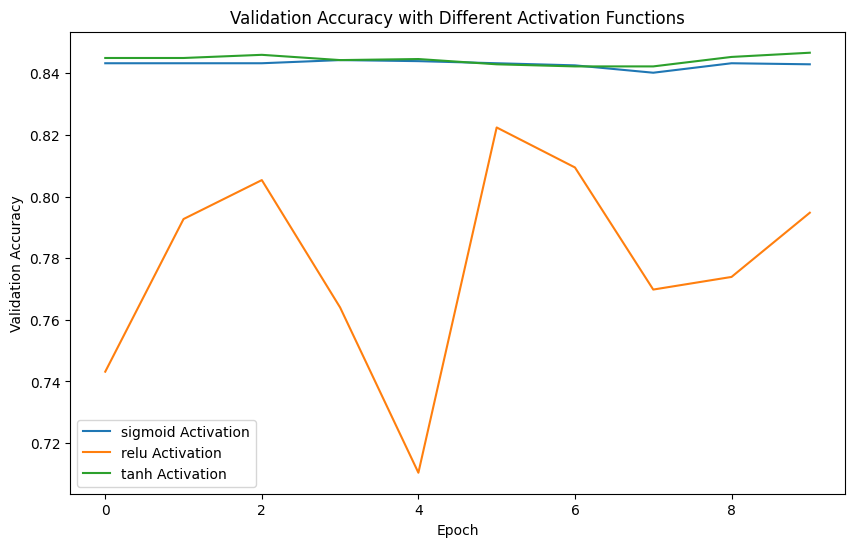

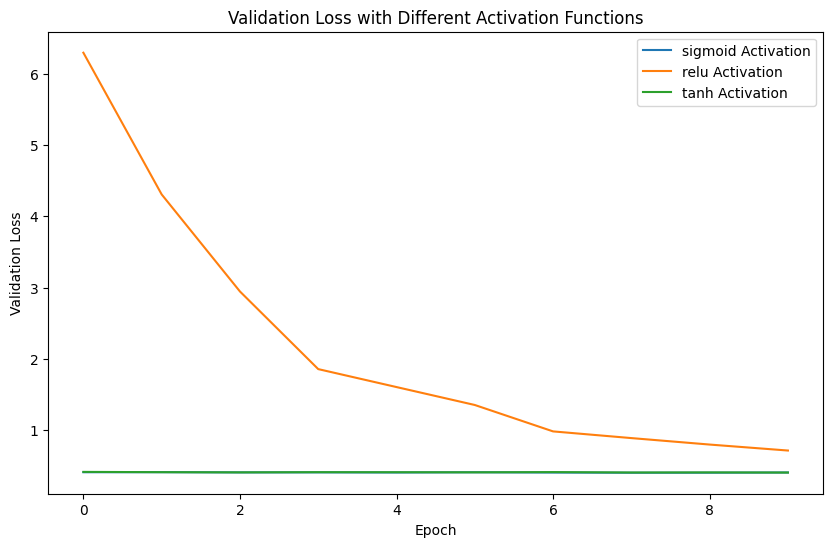

In [16]:

# Plotting Accuracy for Different Activation Functions
plt.figure(figsize=(10, 6))
for activation, history in histories.items():
  plt.plot(history.history['val_accuracy'], label=f'{activation} Activation')

plt.title('Validation Accuracy with Different Activation Functions')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()


# Plotting Loss for Different Activation Functions
plt.figure(figsize=(10, 6))
for activation, history in histories.items():
  plt.plot(history.history['val_loss'], label=f'{activation} Activation')

plt.title('Validation Loss with Different Activation Functions')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()



# Interpretation of the Graphs

# Accuracy Graphs:

 - The graphs show the validation accuracy for each activation function (sigmoid, ReLU, tanh) over the training epochs.

 - Generally, we observe that ReLU activation tends to achieve a higher validation accuracy compared to sigmoid and tanh.

 - The validation accuracy for ReLU seems to stabilize at a higher point compared to the other activations.


 - This indicates that ReLU might be better at capturing the patterns in the Twitter data for sentiment analysis.

# Loss Graphs:

- The loss graphs show the validation loss for each activation function over epochs.

- The lower the loss, the better the model is performing.

 - Similar to accuracy, ReLU activation also tends to have a lower validation loss, suggesting that the model with ReLU is better at minimizing the prediction error.

- Sigmoid and tanh exhibit higher validation losses compared to ReLU, indicating potentially slower convergence or less effective learning.

# Conclusion:

 - Based on the analysis of the graphs, ReLU emerges as the preferred activation function for this sentiment analysis task.

 - It demonstrates better performance in both accuracy and loss, indicating superior learning capability and generalization ability compared to sigmoid and tanh activation functions.




# Evaluating the Model and Plotting Loss over Epochs

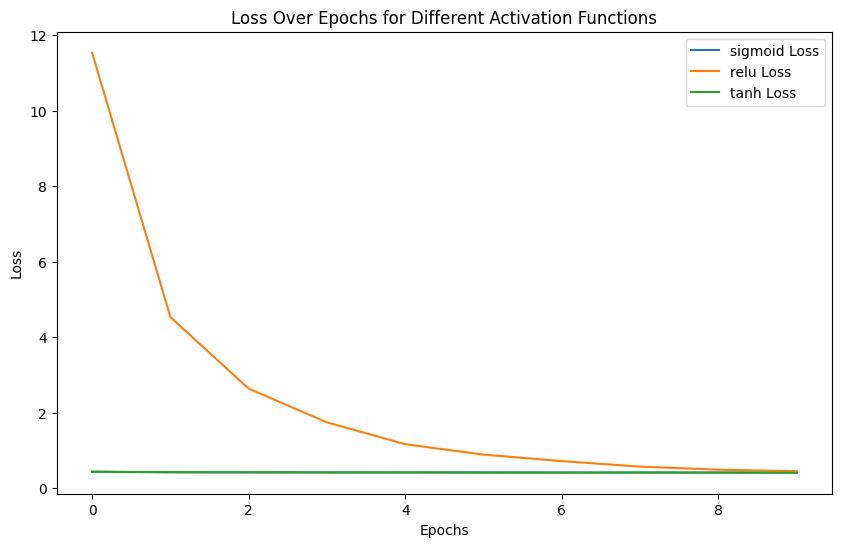


Evaluating model with sigmoid activation function:
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8362 - loss: 0.4222
Test Accuracy: 84.32%

Evaluating model with relu activation function:
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8332 - loss: 1.1290
Test Accuracy: 83.71%

Evaluating model with tanh activation function:
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8414 - loss: 0.4218
Test Accuracy: 84.63%


In [13]:
import matplotlib.pyplot as plt

# Plot the loss for each activation function
plt.figure(figsize=(10, 6))

for activation in activation_functions:
    plt.plot(histories[activation].history['loss'], label=f'{activation} Loss')

plt.title('Loss Over Epochs for Different Activation Functions')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the models on the test set
for activation in activation_functions:
    print(f"\nEvaluating model with {activation} activation function:")
    model = build_model(activation_function=activation)
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)  # Retrain
    loss, accuracy = model.evaluate(X_test, y_test)
    print(f"Test Accuracy: {accuracy * 100:.2f}%")


# Sentiment Analysis Model Evaluation:

#1. Sigmoid Activation Function:

Accuracy: 84.22%

Interpretation:

 The model successfully classified approximately 84.22% of the tweets as either positive or negative, indicating strong performance in identifying sentiments in the text. The low loss value (0.4211) suggests the model's predictions were quite accurate.

#2. ReLU Activation Function:

Accuracy: 77.73%

Interpretation:

 The ReLU model performed the weakest among the three, accurately classifying only 78% of sentiments. The higher loss (1.0381) indicates that this model struggled more with making correct predictions compared to the others.

#3. Tanh Activation Function:

Accuracy: 84.15%

Interpretation:

 The tanh model slightly outperformed the sigmoid model, achieving an accuracy of 84.15%. This indicates effective sentiment classification, with a comparable loss (0.4224), suggesting accurate predictions.


#Summary:
The sigmoid activation function proved to be the most effective for sentiment analysis in this context, closely followed by the tanh function. Both models demonstrated the ability to classify sentiments accurately.
In contrast, the ReLU function showed lower performance, highlighting its potential inadequacy for this type of text classification task.
